# Chapter 4.1: Mean Estimation for digits3

Load packages.

In [104]:
devtools::install("../../elasticproc2d", quiet=TRUE, quick=TRUE)
library(elasticproc2d)

In [105]:
library(dplyr)
library(viridis)
library(RColorBrewer)
library(ggplot2)
library(gridExtra)

Settings.

In [106]:
theme_thesis <- function(){ 
    theme_bw() %+replace%    #replace elements we want to change
    theme()
}

# Display plots in smaller size
options(repr.plot.width=10, repr.plot.height=6)

Load datasets:
1. Digits3
2. Digits3 + Random Rotation / Scaling / Translation

In [107]:
source("../scripts/load_datasets.R")

In [108]:
set.seed(18)
digits3 <- curves.digit3(rotate=FALSE, scale=FALSE, center=FALSE)
set.seed(18)
digits3.center <- curves.digit3(rotate=FALSE, scale=FALSE, center=TRUE)

In [109]:
set.seed(18)
digits3.eucl <- curves.digit3(rotate=TRUE, scale=TRUE, center=FALSE, translate=TRUE)
set.seed(18)
digits3.eucl.center <- curves.digit3(rotate=TRUE, scale=TRUE, center=TRUE, translate=TRUE)

#### Estimate mean for digits3 and digits3 + Eucl Transforms.

In [110]:
penalty <- 2
knots <- seq(0,1,length=13)
knots.poly <- seq(0,1,length=13)

1. Elastic Mean

In [111]:
e.mean.smooth <- elasdics::compute_elastic_mean(digits3, knots=knots, type = "smooth")
e.mean.poly <- elasdics::compute_elastic_mean(digits3, knots=knots.poly, type = "polygon")
e.mean.eucl.smooth <- elasdics::compute_elastic_mean(digits3.eucl, knots=knots, type = "smooth")
e.mean.eucl.poly <- elasdics::compute_elastic_mean(digits3.eucl, knots=knots.poly, type = "polygon")

2. Full Procrustes Mean

In [112]:
fp.mean.smooth <- compute_elastic_proc2d_mean(digits3, knots = knots, type = "smooth", penalty = penalty, max_iter=0)
fp.mean.poly <- compute_elastic_proc2d_mean(digits3, knots = knots.poly, type = "polygon", penalty = penalty, max_iter=0)
fp.mean.eucl.smooth <- compute_elastic_proc2d_mean(digits3.eucl, knots = knots, type = "smooth", penalty = penalty, max_iter=0)
fp.mean.eucl.poly <- compute_elastic_proc2d_mean(digits3.eucl, knots = knots.poly, type = "polygon", penalty = penalty, max_iter=0)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

3. Elastic Full Procrustes Mean

In [113]:
efp.mean.smooth <- compute_elastic_proc2d_mean(digits3, knots = knots, type = "smooth", penalty = penalty)
efp.mean.poly <- compute_elastic_proc2d_mean(digits3, knots = knots.poly, type = "polygon", penalty = penalty)
efp.mean.eucl.smooth <- compute_elastic_proc2d_mean(digits3.eucl, knots = knots, type = "smooth", penalty = penalty)
efp.mean.eucl.poly <- compute_elastic_proc2d_mean(digits3.eucl, knots = knots.poly, type = "polygon", penalty = penalty)

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

Function for mean plot. Use colorblind friendly "paired" palette.

In [114]:
palette <- brewer.pal(6, "Paired")

In [115]:
means <- list(
    list(e.mean.smooth, e.mean.poly),
    list(fp.mean.smooth, fp.mean.poly),
    list(efp.mean.smooth, efp.mean.poly)
    )
means.eucl <- list(
    list(e.mean.eucl.smooth, e.mean.eucl.poly),
    list(fp.mean.eucl.smooth, fp.mean.eucl.poly),
    list(efp.mean.eucl.smooth, efp.mean.eucl.poly)
    )

### Fig 4.1: Means for digits3 without and with rotation / translation / scaling.

Save data curve splot.

In [116]:
p.digits3 <- ggplot(bind_rows(digits3, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.5, alpha=0.6, aes(group=id, color=id), show.legend=FALSE) +
    geom_point(size=1, alpha=0.6, aes(group=id, color=id), show.legend=FALSE) +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    scale_color_grey() +
    scale_y_continuous(breaks = c(-40,0,-20)) + scale_x_continuous(breaks = c(40,0,20)) +
    coord_fixed(xlim=c(0,50), ylim=c(-50,0)) + 
    theme_thesis() + 
    theme(aspect.ratio = 1)

p.digits3.eucl <- ggplot(bind_rows(digits3.eucl, .id="id"), aes(x=X1, y=X2)) + 
    geom_path(size=0.25, aes(group=id, color=id), show.legend=FALSE) +
    geom_point(size=0.5, aes(group=id, color=id), show.legend=FALSE) +
    scale_color_grey() +
    labs(x = "$\\Re(\\beta)$", y = "$\\Im(\\beta)$") +
    scale_y_continuous(breaks = c(-50,0,50)) + scale_x_continuous(breaks = c(-50,0,50)) +
    coord_fixed(xlim=c(-100,80), ylim=c(-100,80)) + 
    theme_thesis() + 
    theme(aspect.ratio=1)

In [117]:
p.means <- lapply(1:3, function(i){
    if(i == 1){ 
        m.s <- elasdics::get_evals(means[[i]][[1]]) 
        m.p <- elasdics::get_evals(means[[i]][[2]]) 
    } else {
        m.s <- get_evals(means[[i]][[1]])
        m.p <- get_evals(means[[i]][[2]]) 
    }
    p <- ggplot() + 
        geom_path(data=m.p, aes(x=X1, y=X2), size=1, color=palette[2*i-1]) +
        geom_path(data=m.s, aes(x=X1, y=X2), size=1, color=palette[2*i]) + 
        theme_thesis() +
        coord_fixed() +
        theme(aspect.ratio = 1)
    if(i == 1){
        p <- p + labs(x = "$\\Re(\\beta - \\overline\\beta)$", y = "$\\Im(\\beta-\\overline\\beta)$")
        p <- p + coord_fixed(xlim=c(-20,20), ylim=c(-20,20), clip="on")
        #p <- p + scale_y_continuous(breaks = c(-1,0,1)) + scale_x_continuous(breaks = c(-1,0,1))
        p <- p + geom_path(data=bind_rows(digits3.center, .id="id"), size=0.5, alpha=0.2, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
            geom_point(data=bind_rows(digits3.center, .id="id"), size=1, alpha=0.2, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
            scale_color_grey()
        p <- p + geom_path(data=m.p, aes(x=X1, y=X2), size=1, color=palette[2*i-1]) +
            geom_path(data=m.s, aes(x=X1, y=X2), size=1, color=palette[2*i])
    } else {
        p <- p + labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$")
        #p <- p + coord_fixed(xlim=c(-1,1), ylim=c(-1,1))
        p <- p + theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank())
    }
    p
})

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



In [118]:
p.means.eucl <- lapply(1:3, function(i){
    if(i == 1){ 
        m.s <- elasdics::get_evals(means.eucl[[i]][[1]])
        #m.s <- m.s %>% filter(X1 > -1 & X1 < 1 & X2 > -1 & X2 < 1)  # Fix that strange clip bug...
        m.p <- elasdics::get_evals(means.eucl[[i]][[2]]) 
    } else {
        m.s <- get_evals(means.eucl[[i]][[1]])
        m.p <- get_evals(means.eucl[[i]][[2]]) 
    }
    p <- ggplot() + 
        geom_path(data=m.p, aes(x=X1, y=X2), size=1, color=palette[2*i-1]) +
        geom_path(data=m.s, aes(x=X1, y=X2), size=1, color=palette[2*i]) + 
        theme_thesis() +
        coord_fixed() +
        theme(aspect.ratio = 1)
    if(i == 1){
        p <- p + labs(x = "$\\Re(\\beta-\\overline\\beta)$", y = "$\\Im(\\beta-\\overline\\beta)$")
        p <- p + coord_fixed(xlim=c(-5,5), ylim=c(-5,5))
        p <- p + scale_y_continuous(breaks = c(-5,0,5)) + scale_x_continuous(breaks = c(-5,0,5))
        #p <- p + geom_path(data=bind_rows(digits3.eucl, .id="id"), size=0.5, alpha=0.2, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
        #    geom_point(data=bind_rows(digits3.eucl, .id="id"), size=1, alpha=0.2, aes(x=X1, y=X2, group=id, color=id), show.legend=FALSE) +
        #    scale_color_grey()
    } else {
        p <- p + labs(x = "$\\Re(\\widetilde\\beta)$", y = "$\\Im(\\widetilde\\beta)$")
        #p <- p + coord_fixed(xlim=c(-0.15,0.15), ylim=c(-0.15,0.15))
        p <- p + theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank())
    }
    p
})

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



## Fig. 4.1.: Merge plots

png 
  2

png 
  2

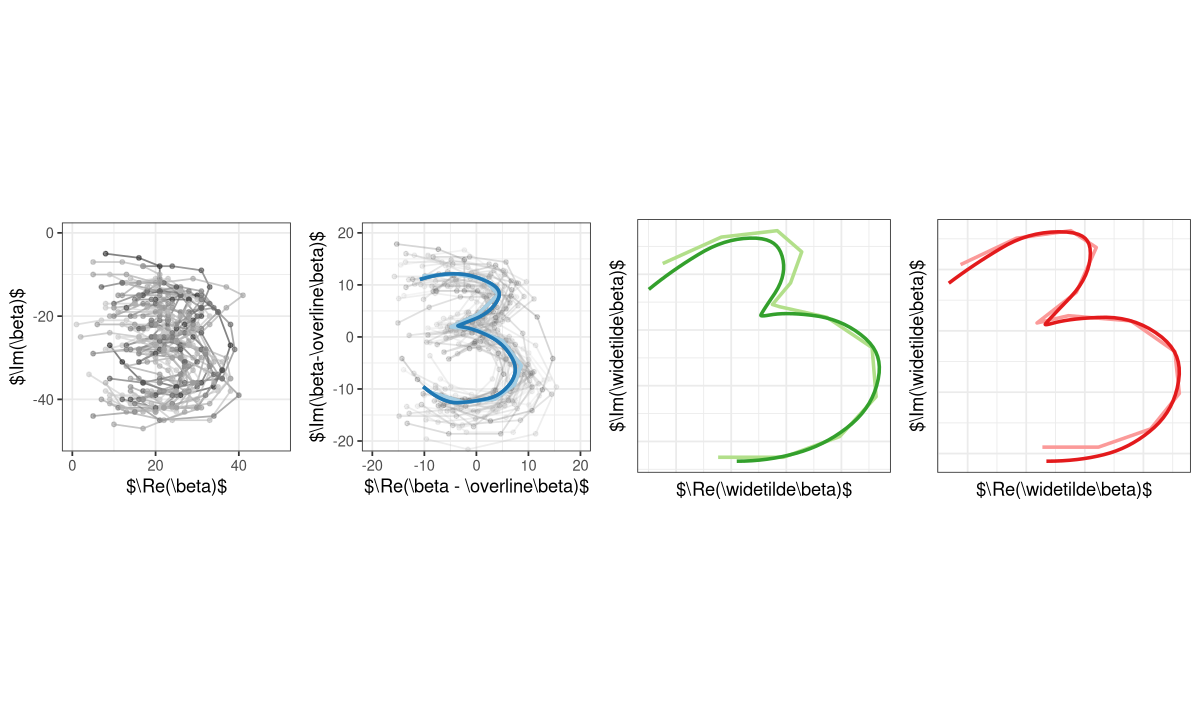

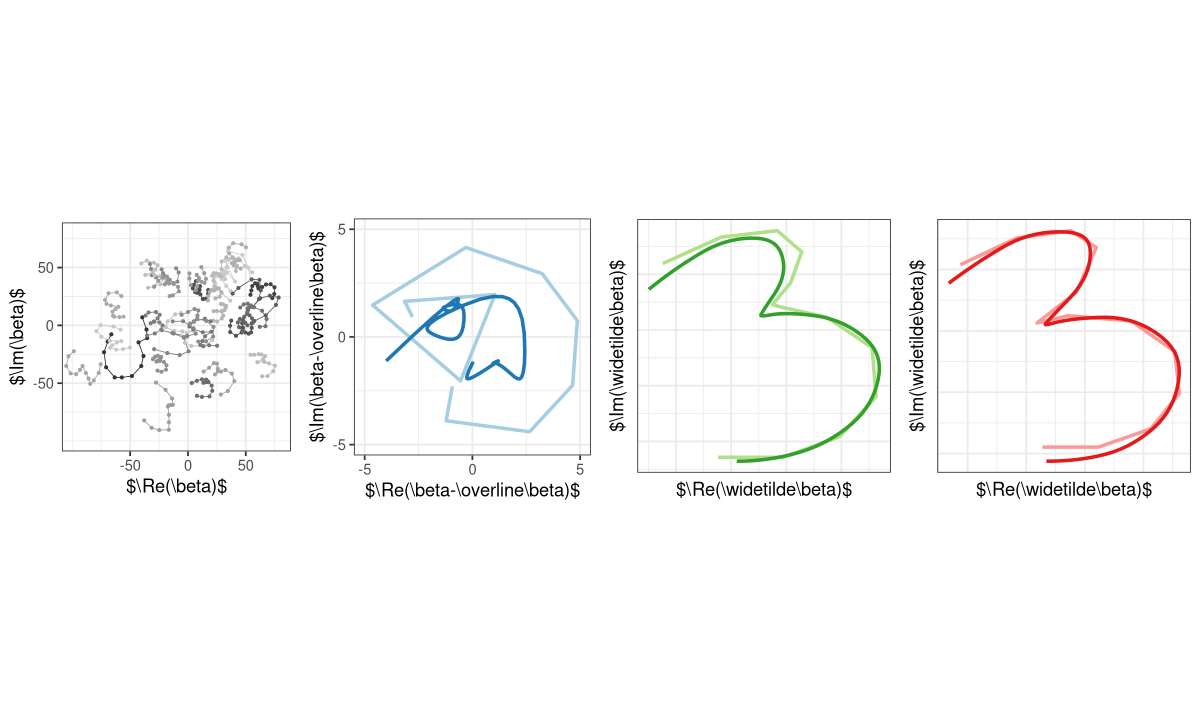

In [119]:
fname = "../tex/graphics/41-digit3-means.tex"
tikzDevice::tikz(file = fname, width = 6, height = 1.66)
grid.arrange(p.digits3, p.means[[1]], p.means[[2]], p.means[[3]], nrow=1)
dev.off()
grid.arrange(p.digits3, p.means[[1]], p.means[[2]], p.means[[3]], nrow=1)
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

fname = "../tex/graphics/41-digit3-means-rot.tex"
tikzDevice::tikz(file = fname, width = 6, height = 1.66)
grid.arrange(p.digits3.eucl, p.means.eucl[[1]], p.means.eucl[[2]], p.means.eucl[[3]], nrow=1)
dev.off()
grid.arrange(p.digits3.eucl, p.means.eucl[[1]], p.means.eucl[[2]], p.means.eucl[[3]], nrow=1)
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

### Fig. 4.2: Elastic Full Procrustes Mean with different Penalties

In [59]:
means.penalty <- lapply(-1:2, function(p){
    mean.smooth <- compute_elastic_proc2d_mean(digits3.eucl, knots = knots, type = "smooth", penalty = p)
    mean.poly <- compute_elastic_proc2d_mean(digits3.eucl, knots = knots.poly, type = "polygon", penalty = p)
    list(mean.smooth, mean.poly)
})

Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis coefficients”
Warning message in smooth.construct.ps.smooth.spec(eval(as.call(list(as.symbol("s"), :
“there is *no* information about some basis

png 
  2

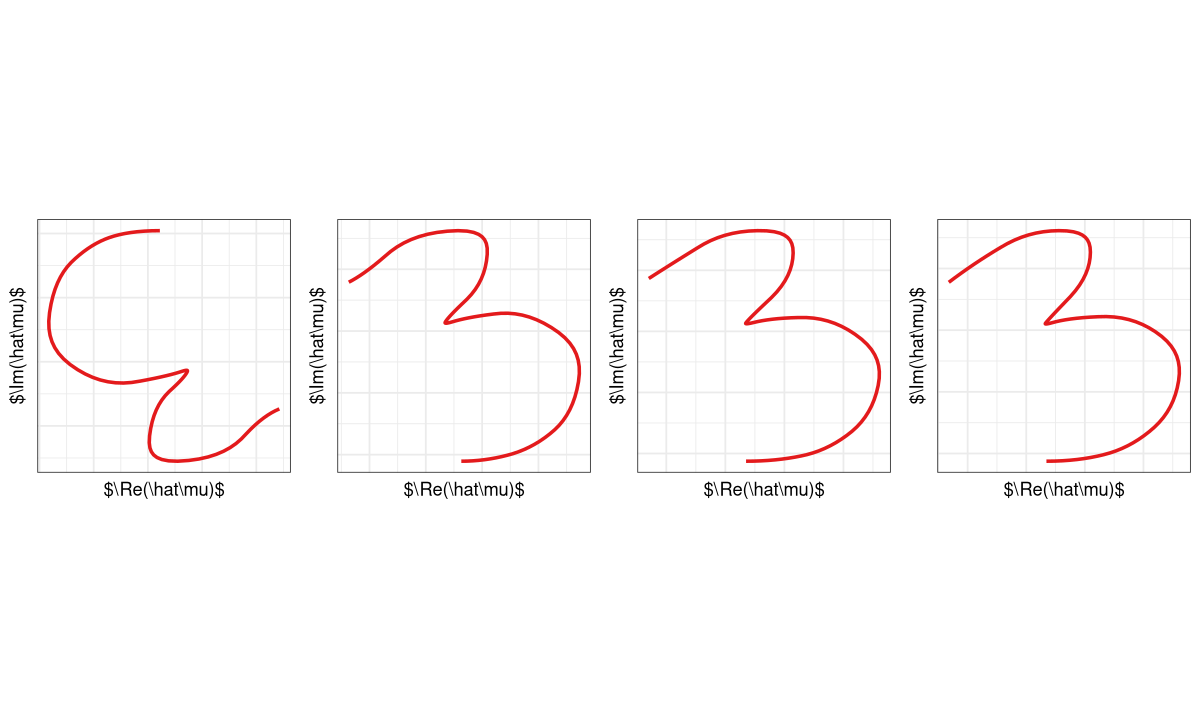

In [60]:
p.penalty <- lapply(1:4, function(i){
    m.s <- get_evals(means.penalty[[i]][[1]])
    #m.s <- m.s %>% filter(X1 > -1 & X1 < 1 & X2 > -1 & X2 < 1)  # Fix that strange clip bug...
    m.p <- get_evals(means.penalty[[i]][[2]]) 
    p <- ggplot() + 
        #geom_path(data=m.p, aes(x=X1, y=X2), size=1, color=palette[5]) +
        geom_path(data=m.s, aes(x=X1, y=X2), size=1, color=palette[6]) + 
        theme_thesis() +
        labs(x = "$\\Re(\\hat\\mu)$", y = "$\\Im(\\hat\\mu)$") +
        coord_fixed() +
        theme(aspect.ratio=1) +
        theme(axis.ticks.x = element_blank(), axis.ticks.y = element_blank(),
              axis.text.x = element_blank(), axis.text.y = element_blank())
    p
})

fname = "../tex/graphics/41-digit3-pen.tex"
tikzDevice::tikz(file = fname, width = 6, height = 1.5)
grid.arrange(p.penalty[[1]], p.penalty[[2]], p.penalty[[3]], p.penalty[[4]], nrow=1)
dev.off()
grid.arrange(p.penalty[[1]], p.penalty[[2]], p.penalty[[3]], p.penalty[[4]], nrow=1)
lines <- readLines(con=fname)
lines <- lines[-which(grepl("\\path\\[clip\\]*", lines,perl=F))]
lines <- lines[-which(grepl("\\path\\[use as bounding box*", lines,perl=F))]
writeLines(lines,con=fname)

### Table 4.1: Mean distance to estimated mean

In [61]:
dist.means <- lapply(1:3, function(j){
    m.s <- means[[j]][[1]]
    m.p <- means[[j]][[2]]
    dists.s <- sapply(m.s$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    dists.p <- sapply(m.p$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    list(mean(dists.s), mean(dists.p))
})

dist.means.eucl <- lapply(1:3, function(j){
    m.s <- means.eucl[[j]][[1]]
    m.p <- means.eucl[[j]][[2]]
    dists.s <- sapply(m.s$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    dists.p <- sapply(m.p$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    list(mean(dists.s), mean(dists.p))
})

dist.means.penalty<- lapply(1:4, function(j){
    m.s <- means.penalty[[j]][[1]]
    m.p <- means.penalty[[j]][[2]]
    dists.s <- sapply(m.s$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    dists.p <- sapply(m.p$data_curves, function(curve){
        attr(curve, "dist_to_mean")
    })
    list(mean(dists.s), mean(dists.p))
})

In [62]:
dist.means
dist.means.eucl
dist.means.penalty

[[1]]
[[1]][[1]]
[1] 3.104906

[[1]][[2]]
[1] 2.858329


[[2]]
[[2]][[1]]
[1] 0.5293184

[[2]][[2]]
[1] 0.5586445


[[3]]
[[3]][[1]]
[1] 0.3418213

[[3]][[2]]
[1] 0.3067654

[[1]]
[[1]][[1]]
[1] 6.482387

[[1]][[2]]
[1] 5.355656


[[2]]
[[2]][[1]]
[1] 0.5293184

[[2]][[2]]
[1] 0.5586447


[[3]]
[[3]][[1]]
[1] 0.3418217

[[3]][[2]]
[1] 0.3067782

[[1]]
[[1]][[1]]
[1] 0.3370567

[[1]][[2]]
[1] 0.2885309


[[2]]
[[2]][[1]]
[1] 0.3380459

[[2]][[2]]
[1] 0.3048753


[[3]]
[[3]][[1]]
[1] 0.3418428

[[3]][[2]]
[1] 0.3064146


[[4]]
[[4]][[1]]
[1] 0.3418217

[[4]][[2]]
[1] 0.3067782